In [1]:
from google.colab import drive
drive.mount('/content/grive/')

Mounted at /content/grive/


In [2]:
# !pip install albumentations

In [3]:
# pip install -U albumentation

import tqdm
import os
import cv2
import albumentations as alb

def data_augmentation(images_path, multiplier):

    images=images_path



    for image in tqdm.tqdm(os.listdir(images)):
            img_path = os.path.join(images, image)
            img = cv2.imread(img_path)
            # img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            for x in range(multiplier):
                        # Albumentation phase

                try:
                    transform = alb.Compose([
                        alb.RandomCrop(width=640, height=640, p=0.01),
                        alb.Rotate(limit=(-90, 90),crop_border=True,p=0.3),
                        alb.HorizontalFlip(p=0.5),
                        alb.RandomGamma(p=0.01),
                        alb.RGBShift(p=0.1),
                        alb.VerticalFlip(p=0.3),
                        alb.RandomBrightnessContrast(
                                        contrast_limit=(0.15,0.15),
                                        brightness_limit=(0.1,0.1),
                                        p=1.
                                        ),
                        alb.ColorJitter(
                            contrast=0,
                            saturation=0.01,
                            hue=0.015,
                            brightness=0.1 )])

                    transformed_instance = transform(image=img)

                    transformed_image = transformed_instance['image']

                    cv2.imwrite( f'{images}/{os.path.splitext(image)[0]}_{x}_.jpg', transformed_image)

                except Exception as e:
                        pass


In [4]:
multiplier1=5
multiplier2=20

Healthy='/content/grive/MyDrive/JoanaMakerere/data/Healthy'
Unhealthy='/content/grive/MyDrive/JoanaMakerere/data/Unhealthy'

# data_augmentation(Unhealthy,multiplier2)
# data_augmentation(Healthy,multiplier1)

# 1. **Loading data**

In [5]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [6]:
path='/content/grive/MyDrive/JoanaMakerere/data'
data = tf.keras.utils.image_dataset_from_directory(path)

Found 3723 files belonging to 3 classes.


In [7]:
import zipfile
import os

def zip_folder(source_path, destination_path):
  """Zips a folder (excluding any files within the directory itself) to a specified destination.

  Args:
      source_path (str): The path to the folder to be zipped.
      destination_path (str): The path to the destination ZIP file.
  """

  try:
    with zipfile.ZipFile(destination_path, 'w') as zip_file:
      zip_file.write(source_path, arcname=os.path.basename(source_path), compress_type=zipfile.ZIP_DEFLATED)
  except Exception as e:
        print(f"An error occurred while zipping the folder: {e}")
# Replace with your actual paths
source_path = r"/content/grive/MyDrive/JoanaMakerere/data"
destination_path = r"/content/grive/MyDrive/JoanaMakerere/data.zip"

# zip_folder(source_path, destination_path)


In [8]:
data_iterator = data.as_numpy_iterator()
batch_images, batch_labels = data_iterator.next()


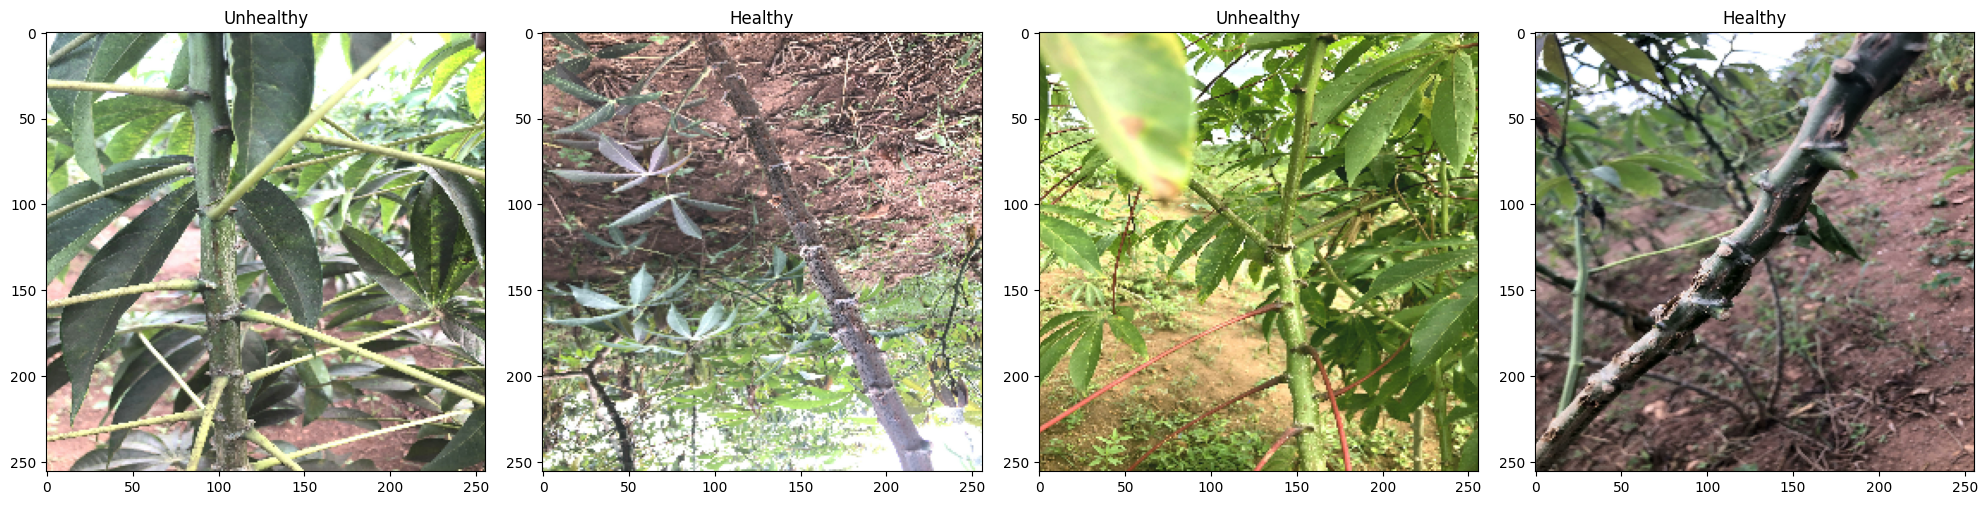

In [9]:
# Create the figure and subplots
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate over the first 4 images and labels
for idx, (img, label) in enumerate(zip(batch_images[:4], batch_labels[:4])):
    # Process and display the image
    ax[idx].imshow(img.astype(int))

    class_name = data.class_names[label]

    # Set the title with the class name
    ax[idx].title.set_text(class_name)

plt.tight_layout()
plt.show()

In [10]:
batch=data_iterator.next()

**2. SCALE DATA**

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
# Checking if the scaling worked
# data.as_numpy_iterator().next()[0]

**5. Split Data**

In [13]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [14]:
train_size

93

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# 6**. Building Deep learning model**

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 64)        0

In [21]:
logdir='logs'

In [22]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=15, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/15
93/93 [==============================] - 803s 8s/step - loss: 0.5387 - accuracy: 0.7396 - val_loss: 0.4664 - val_accuracy: 0.7636
Epoch 2/15
93/93 [==============================] - 468s 5s/step - loss: 0.4403 - accuracy: 0.8068 - val_loss: 0.3516 - val_accuracy: 0.8573
Epoch 3/15
93/93 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.8481

**7. Plot performance**

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **10. Evaluate**

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in val.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# **11. Save the model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join(path,'models','cassava_brown_streak.h5'))